In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns

In [2]:
data = pd.read_csv('../input/iris-for-decision-tree/Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


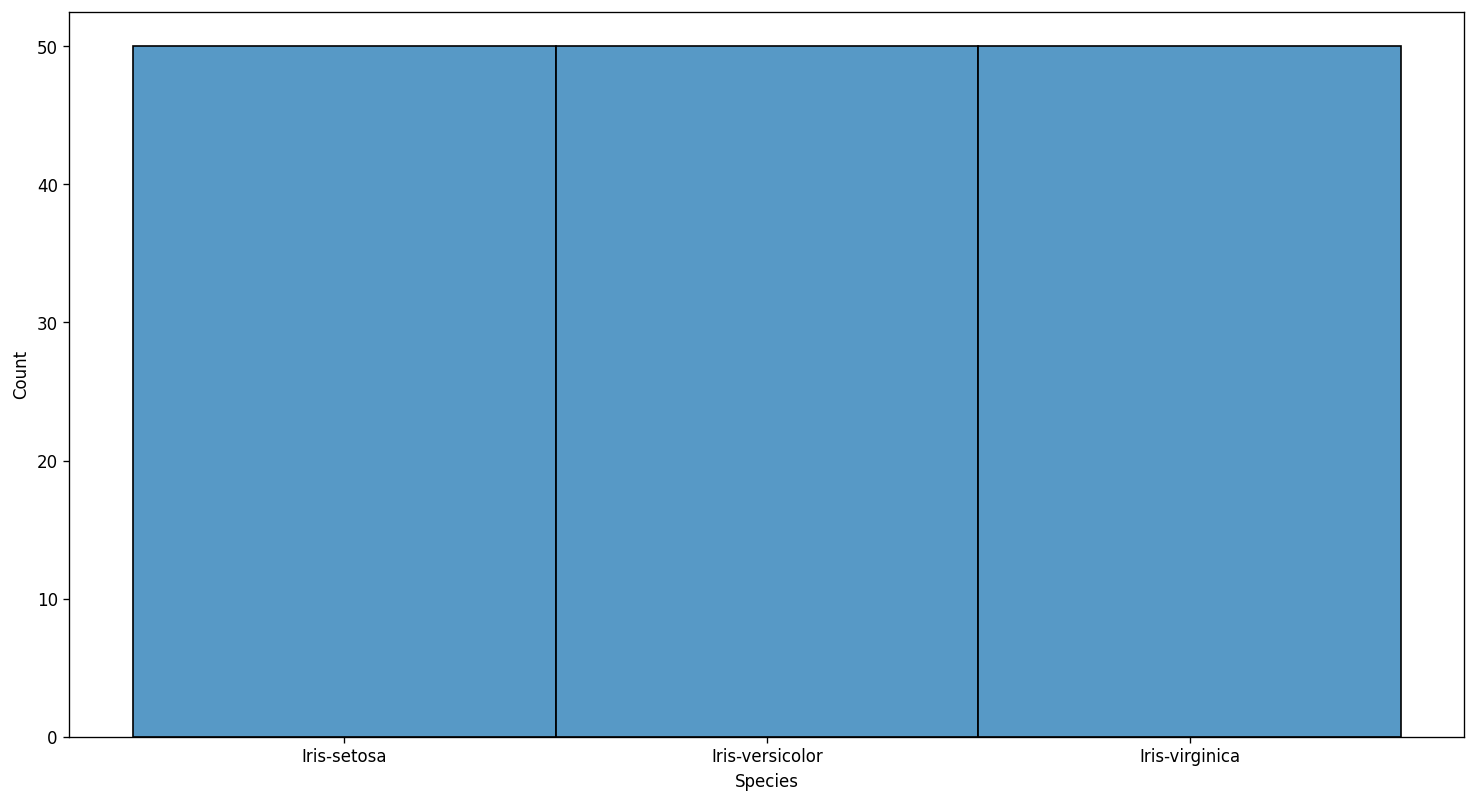

In [5]:
plt.figure(figsize=(15,8), dpi = 120)
sns.histplot(data = data, x = 'Species')
plt.show()

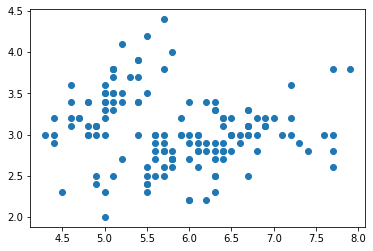

In [6]:
plt.scatter(data['SepalLengthCm'],data['SepalWidthCm'])
plt.show()

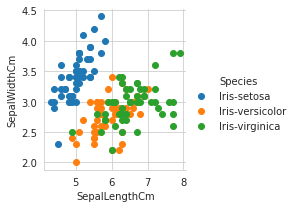

In [7]:
sns.set_style('whitegrid')
sns.FacetGrid(data,hue="Species") \
   .map(plt.scatter,'SepalLengthCm','SepalWidthCm') \
   .add_legend()
plt.show()

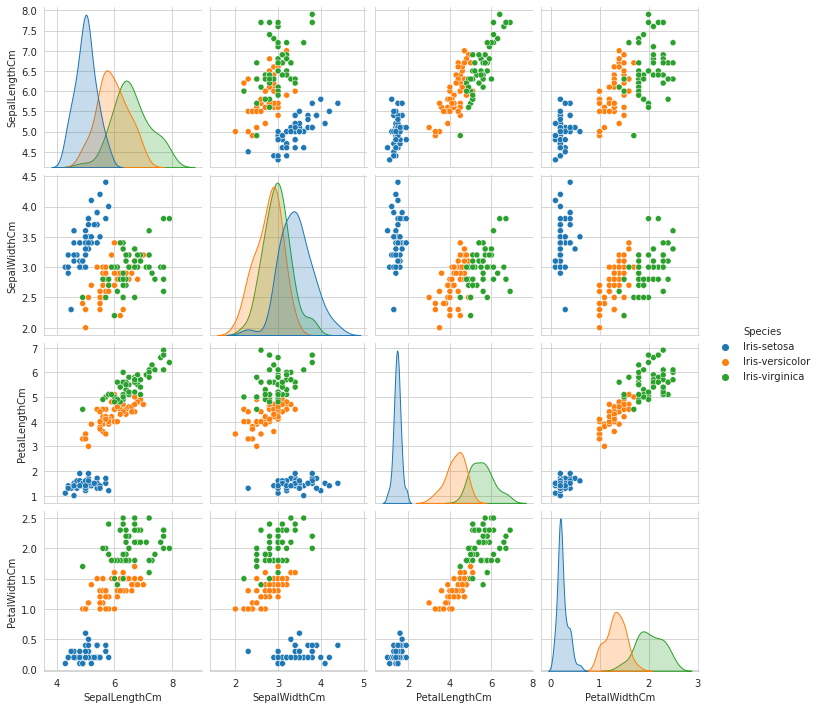

In [8]:
sns.pairplot(data.drop(['Id'],axis = 1),hue="Species")
plt.show()

In [9]:
# Separate target from features
y_trail = data['Species']
features = data.drop(['Species'], axis=1)
#Preview features
features.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


In [10]:
df1 = {"species": 0}
df2 = {"species": 1}
df3 = {"species": 2}
y = pd.DataFrame()
for i in y_trail:
    if i == "Iris-setosa":
        y = y.append(df1, ignore_index = True)
    elif i == "Iris-versicolor":
        y = y.append(df2, ignore_index = True)
    else:
        y = y.append(df3, ignore_index = True)
X = features

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size = 0.25, random_state= 0)

In [12]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

[Text(200.88000000000002, 181.2, 'X[0] <= 0.529\nentropy = 1.581\nsamples = 112\nvalue = [37, 34, 41]'),
 Text(133.92000000000002, 108.72, 'X[4] <= -0.542\nentropy = 0.999\nsamples = 71\nvalue = [37, 34, 0]'),
 Text(66.96000000000001, 36.23999999999998, 'entropy = 0.0\nsamples = 37\nvalue = [37, 0, 0]'),
 Text(200.88000000000002, 36.23999999999998, 'entropy = 0.0\nsamples = 34\nvalue = [0, 34, 0]'),
 Text(267.84000000000003, 108.72, 'entropy = 0.0\nsamples = 41\nvalue = [0, 0, 41]')]

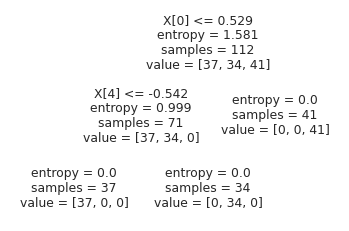

In [13]:
#Fitting Decision Tree classifier to the training set  
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier  
classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)  
classifier.fit(X_train, y_train)  
tree.plot_tree(classifier)

In [14]:
#Predicting the test set result  
y_pred= classifier.predict(X_test)  
from sklearn import metrics
print('Accuracy Score:', metrics.accuracy_score(y_test,y_pred))

Accuracy Score: 1.0


In [15]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm = confusion_matrix(y_test, y_pred)  
cm

array([[13,  0,  0],
       [ 0, 16,  0],
       [ 0,  0,  9]])

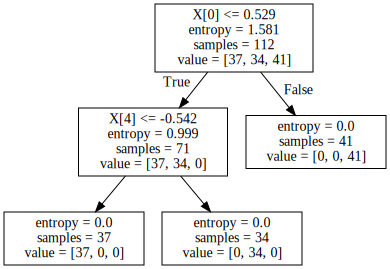

In [16]:
import graphviz
dot_data = tree.export_graphviz(classifier,out_file=None)
graph = graphviz.Source(dot_data)
graph